# Soccer Database
Pandas refresh project
## Player exploration

## Import stuff

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sqlite3
import seaborn as sns

### General settings

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

## Import data

In [3]:
con = sqlite3.connect('data/database.sqlite')

### Load tables into dataframes

In [4]:
country = pd.read_sql_query('SELECT * FROM Country', con)
league = pd.read_sql_query('SELECT * FROM League', con)
match = pd.read_sql_query('SELECT * FROM Match', con)
player = pd.read_sql_query('SELECT * FROM Player', con)
player_attr = pd.read_sql_query('SELECT * FROM Player_Attributes', con)
team = pd.read_sql_query('SELECT * FROM Team', con)
team_attr = pd.read_sql_query('SELECT * FROM Team_Attributes', con)

### Let's look at player/player_attr

In [5]:
player.head()

id  player_api_id         player_name  player_fifa_api_id  \
0   1         505942  Aaron Appindangoye              218353   
1   2         155782     Aaron Cresswell              189615   
2   3         162549         Aaron Doran              186170   
3   4          30572       Aaron Galindo              140161   
4   5          23780        Aaron Hughes               17725   

              birthday  height  weight  
0  1992-02-29 00:00:00  182.88     187  
1  1989-12-15 00:00:00  170.18     146  
2  1991-05-13 00:00:00  170.18     163  
3  1982-05-08 00:00:00  182.88     198  
4  1979-11-08 00:00:00  182.88     154

In [6]:
player_attr.head()

id  player_fifa_api_id  player_api_id                 date  overall_rating  \
0   1              218353         505942  2016-02-18 00:00:00            67.0   
1   2              218353         505942  2015-11-19 00:00:00            67.0   
2   3              218353         505942  2015-09-21 00:00:00            62.0   
3   4              218353         505942  2015-03-20 00:00:00            61.0   
4   5              218353         505942  2007-02-22 00:00:00            61.0   

   potential preferred_foot attacking_work_rate defensive_work_rate  crossing  \
0       71.0          right              medium              medium      49.0   
1       71.0          right              medium              medium      49.0   
2       66.0          right              medium              medium      49.0   
3       65.0          right              medium              medium      48.0   
4       65.0          right              medium              medium      48.0   

   finishing  heading_accuracy  short_passing  volleys  dribbling  curve  \
0       44.0              71.0           61.0     44.0       51.0   45.0   
1       44.0              71.0           61.0     44.0       51.0   45.0   
2       44.0              71.0           61.0     44.0       51.0   45.0   
3       43.0              70.0           60.0     43.0       50.0   44.0   
4       43.0              70.0           60.0     43.0       50.0   44.0   

   free_kick_accuracy  long_passing  ball_control  acceleration  sprint_speed  \
0                39.0          64.0          49.0          60.0          64.0   
1                39.0          64.0          49.0          60.0          64.0   
2                39.0          64.0          49.0          60.0          64.0   
3                38.0          63.0          48.0          60.0          64.0   
4                38.0          63.0          48.0          60.0          64.0   

   agility  reactions  balance  shot_power  jumping  stamina  strength  \
0     59.0       47.0     65.0        55.0     58.0     54.0      76.0   
1     59.0       47.0     65.0        55.0     58.0     54.0      76.0   
2     59.0       47.0     65.0        55.0     58.0     54.0      76.0   
3     59.0       46.0     65.0        54.0     58.0     54.0      76.0   
4     59.0       46.0     65.0        54.0     58.0     54.0      76.0   

   long_shots  aggression  interceptions  positioning  vision  penalties  \
0        35.0        71.0           70.0         45.0    54.0       48.0   
1        35.0        71.0           70.0         45.0    54.0       48.0   
2        35.0        63.0           41.0         45.0    54.0       48.0   
3        34.0        62.0           40.0         44.0    53.0       47.0   
4        34.0        62.0           40.0         44.0    53.0       47.0   

   marking  standing_tackle  sliding_tackle  gk_diving  gk_handling  \
0     65.0             69.0            69.0        6.0         11.0   
1     65.0             69.0            69.0        6.0         11.0   
2     65.0             66.0            69.0        6.0         11.0   
3     62.0             63.0            66.0        5.0         10.0   
4     62.0             63.0            66.0        5.0         10.0   

   gk_kicking  gk_positioning  gk_reflexes  
0        10.0             8.0          8.0  
1        10.0             8.0          8.0  
2        10.0             8.0          8.0  
3         9.0             7.0          7.0  
4         9.0             7.0          7.0

### Let's join both DFs

In [9]:
player_full = pd.merge(player, player_attr, left_on='player_api_id', right_on='player_api_id')

In [10]:
player_full.head()

id_x  player_api_id         player_name  player_fifa_api_id_x  \
0     1         505942  Aaron Appindangoye                218353   
1     1         505942  Aaron Appindangoye                218353   
2     1         505942  Aaron Appindangoye                218353   
3     1         505942  Aaron Appindangoye                218353   
4     1         505942  Aaron Appindangoye                218353   

              birthday  height  weight  id_y  player_fifa_api_id_y  \
0  1992-02-29 00:00:00  182.88     187     1                218353   
1  1992-02-29 00:00:00  182.88     187     2                218353   
2  1992-02-29 00:00:00  182.88     187     3                218353   
3  1992-02-29 00:00:00  182.88     187     4                218353   
4  1992-02-29 00:00:00  182.88     187     5                218353   

                  date  overall_rating  potential preferred_foot  \
0  2016-02-18 00:00:00            67.0       71.0          right   
1  2015-11-19 00:00:00            67.0       71.0          right   
2  2015-09-21 00:00:00            62.0       66.0          right   
3  2015-03-20 00:00:00            61.0       65.0          right   
4  2007-02-22 00:00:00            61.0       65.0          right   

  attacking_work_rate defensive_work_rate  crossing  finishing  \
0              medium              medium      49.0       44.0   
1              medium              medium      49.0       44.0   
2              medium              medium      49.0       44.0   
3              medium              medium      48.0       43.0   
4              medium              medium      48.0       43.0   

   heading_accuracy  short_passing  volleys  dribbling  curve  \
0              71.0           61.0     44.0       51.0   45.0   
1              71.0           61.0     44.0       51.0   45.0   
2              71.0           61.0     44.0       51.0   45.0   
3              70.0           60.0     43.0       50.0   44.0   
4              70.0           60.0     43.0       50.0   44.0   

   free_kick_accuracy  long_passing  ball_control  acceleration  sprint_speed  \
0                39.0          64.0          49.0          60.0          64.0   
1                39.0          64.0          49.0          60.0          64.0   
2                39.0          64.0          49.0          60.0          64.0   
3                38.0          63.0          48.0          60.0          64.0   
4                38.0          63.0          48.0          60.0          64.0   

   agility  reactions  balance  shot_power  jumping  stamina  strength  \
0     59.0       47.0     65.0        55.0     58.0     54.0      76.0   
1     59.0       47.0     65.0        55.0     58.0     54.0      76.0   
2     59.0       47.0     65.0        55.0     58.0     54.0      76.0   
3     59.0       46.0     65.0        54.0     58.0     54.0      76.0   
4     59.0       46.0     65.0        54.0     58.0     54.0      76.0   

   long_shots  aggression  interceptions  positioning  vision  penalties  \
0        35.0        71.0           70.0         45.0    54.0       48.0   
1        35.0        71.0           70.0         45.0    54.0       48.0   
2        35.0        63.0           41.0         45.0    54.0       48.0   
3        34.0        62.0           40.0         44.0    53.0       47.0   
4        34.0        62.0           40.0         44.0    53.0       47.0   

   marking  standing_tackle  sliding_tackle  gk_diving  gk_handling  \
0     65.0             69.0            69.0        6.0         11.0   
1     65.0             69.0            69.0        6.0         11.0   
2     65.0             66.0            69.0        6.0         11.0   
3     62.0             63.0            66.0        5.0         10.0   
4     62.0             63.0            66.0        5.0         10.0   

   gk_kicking  gk_positioning  gk_reflexes  
0        10.0             8.0          8.0  
1        10.0             8.0          8.0  
2        10.0            

#### Search for players name. Also show players with the same name (like 'Ronaldo')

In [22]:
def shownames(search_name):
    display(player[player['player_name'].str.contains(search_name)])

In [23]:
shownames('Lionel')

id  player_api_id        player_name  player_fifa_api_id  \
6162  6169          35451   Lionel Ainsworth              173349   
6163  6170          40712     Lionel Cappone              137317   
6164  6171         210437      Lionel Carole              201041   
6165  6172          37366  Lionel Djebi-Zadi              171742   
6166  6173         277840    Lionel Gendarme              184095   
6167  6174          33617      Lionel Letizi                1677   
6168  6175          26114      Lionel Mathis               41634   
6169  6176          30981       Lionel Messi              158023   
6170  6177          42554    Lionel Pizzinat              105314   
6171  6178          38922     Lionel Scaloni                8842   
6172  6179         291642       Lionel Zouma              206220   

                 birthday  height  weight  
6162  1987-10-01 00:00:00  165.10     132  
6163  1979-02-08 00:00:00  182.88     163  
6164  1991-04-12 00:00:00  182.88     174  
6165  1982-05-20 00:00:00  187.96     176  
6166  1989-02-20 00:00:00  185.42     152  
6167  1973-05-28 00:00:00  187.96     176  
6168  1981-10-04 00:00:00  175.26     159  
6169  1987-06-24 00:00:00  170.18     159  
6170  1977-08-09 00:00:00  182.88     165  
6171  1978-05-16 00:00:00  182.88     176  
6172  1993-09-10 00:00:00  190.50     176

#### Show left-footer with the highest free kick accuracy, summed up over all games
Can be done with any other feature than 'free kick accuracy'

In [19]:
mask = player_full['preferred_foot'] == 'left'
player_full.loc[mask].sort_values('free_kick_accuracy', ascending=False).groupby('player_name').count().sort_values('player_api_id', ascending=False)

id_x  player_api_id  player_fifa_api_id_x  \
player_name                                                                 
Alessio Cerci                     54             54                    54   
Felipe                            49             49                    49   
Obafemi Martins                   46             46                    46   
Cicero                            46             46                    46   
Leigh Griffiths                   46             46                    46   
Kwadwo Asamoah                    45             45                    45   
Giorgio Chiellini                 45             45                    45   
Alex                              44             44                    44   
Rafael                            44             44                    44   
Federico Peluso                   42             42                    42   
Fabian Monzon                     42             42                    42   
Christian Guenter                 41             41                    41   
Dodo                              41             41                    41   
Christian Fuchs                   41             41                    41   
Emerson                           40             40                    40   
Valter Birsa                      40             40                    40   
Lorenzo Ariaudo                   40             40                    40   
Goran Pandev                      40             40                    40   
Adriano                           40             40                    40   
Kevin Constant                    39             39                    39   
Romelu Lukaku                     39             39                    39   
Santiago Garcia                   39             39                    39   
Sidney Sam                        39             39                    39   
Juan                              39             39                    39   
Domenico Berardi                  39             39                    39   
Miiko Albornoz                    39             39                    39   
Paulo Dybala                      39             39                    39   
Magnus Eriksson                   38             38                    38   
Fabian Delph                      38             38                    38   
Anthony Mounier                   38             38                    38   
Sulley Ali Muntari                38             38                    38   
Hatem Ben Arfa                    38             38                    38   
Robin van Persie                  38             38                    38   
Dennis Aogo                       38             38                    38   
Keisuke Honda                     38             38                    38   
Urby Emanuelson                   38             38                    38   
Angelo Obinze Ogbonna             38             38                    38   
Kevin Strootman                   38             38                    38   
Lukas Podolski                    38             38                    38   
Juanfran Garcia                   37             37                    37   
Daley Blind                       37             37                    37   
Alvaro Negredo                    37             37                    37   
Jose Goncalves                    37             37                    37   
George Boyd                       37             37                    37   
Maynor Figueroa                   37             37                    37   
Axel Bellinghausen                37             37                    37   
Pablo Armero                      37             37                    37   
Panagiotis Tachtsidis             37             37                    37   
Bryan Ruiz                        37             37                    37   
Marvin Plattenhardt               37             37                    37   
Josue                       

#### Show free kick accuracy evolution of a player in a line chart

In [57]:
def freekickevolution(player_name):
    mask = player_full['player_name'] == player_name
    player_free_kick = player_full.loc[mask]
    
    x = player_free_kick.date
    y = player_free_kick.loc[:,'free_kick_accuracy']

    x = x.iloc[::-1]
    y = y.iloc[::-1]
    fig = plt.figure(figsize=(20,10))

    ax1 = fig.add_subplot(111)

    ax1.set(title=player_name)
    ax1.xaxis.set(visible=False)

    ax1.plot(x, y, label='Free kick accuracy')

    ax1.legend()

    plt.show()

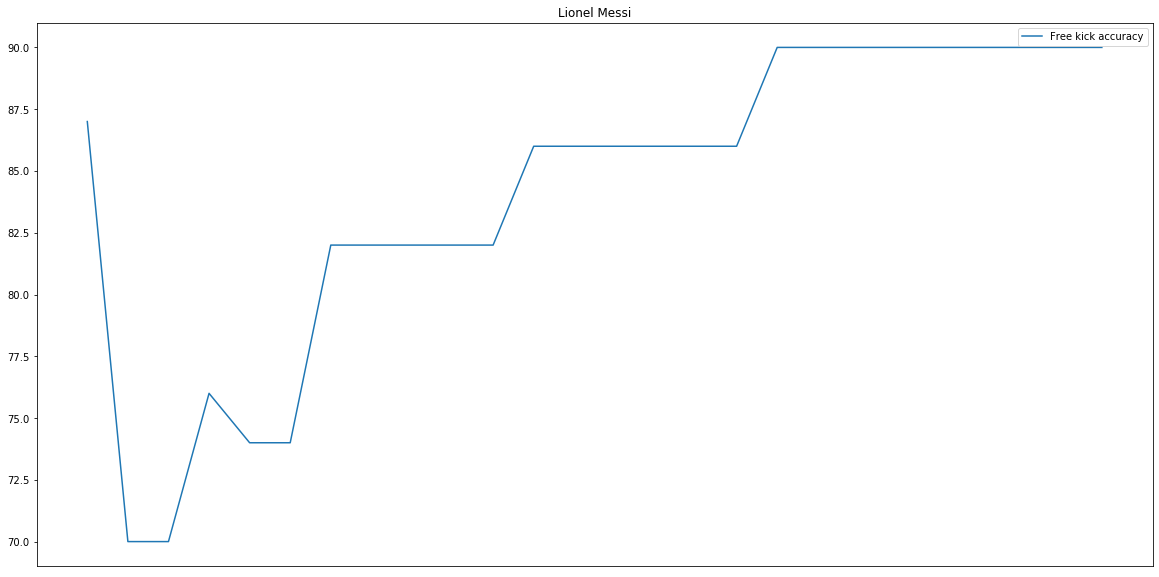

In [58]:
freekickevolution('Lionel Messi')

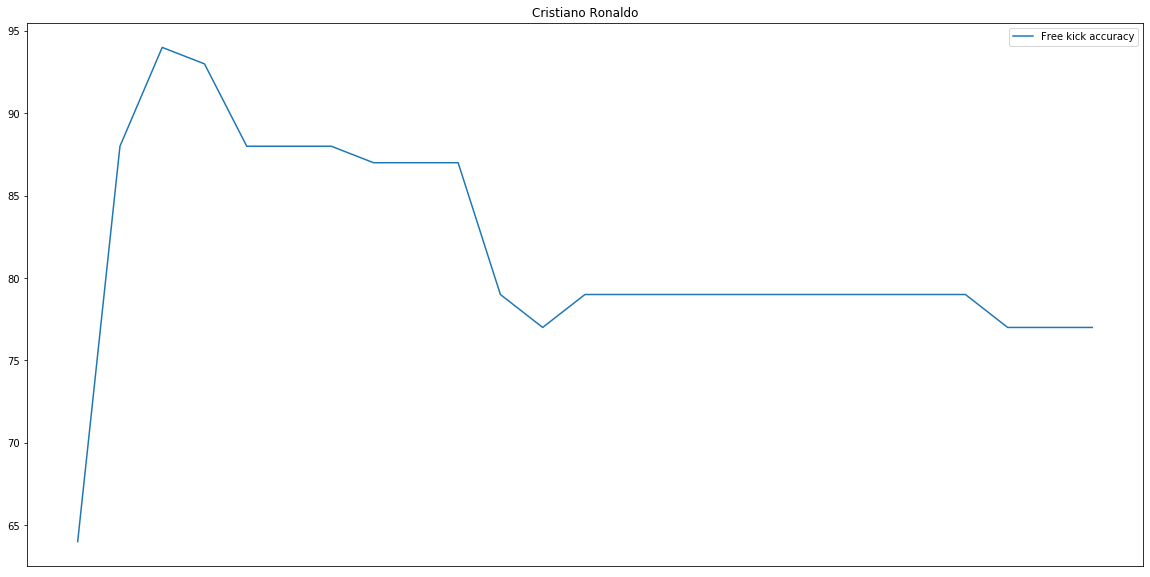

In [59]:
freekickevolution('Cristiano Ronaldo')

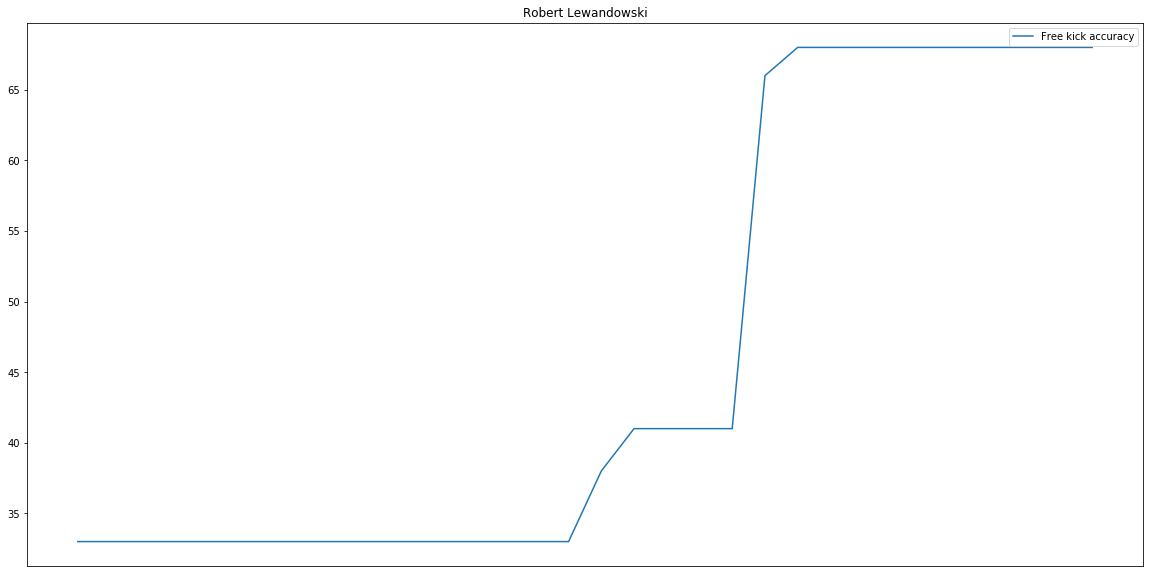

In [60]:
freekickevolution('Robert Lewandowski')